**Loan Status Prediction on a Kaggle Dataset**


**Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder



**Data Collection and Preprocessing**

In [ ]:
#loading dataframe
loan_dataset = pd.read_csv('/content/train_u6lujuX_CVtuZ9i (1).csv')
type(loan_dataset)

pandas.core.frame.DataFrame

In [ ]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
loan_dataset.shape
loan_dataset.Property_Area.unique()
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
# Missing Values
loan_dataset.isnull().sum()


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
# After Dropping missing records
loan_dataset = loan_dataset.dropna()

In [ ]:
loan_dataset.shape

(480, 13)

In [ ]:
#Replace Category variables
loan_dataset.replace({"Loan_Status": {'N':0,'Y':1}}, inplace=True)
loan_dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


In [ ]:
loan_dataset['Loan_Status'].value_counts()

1    332
0    148
Name: Loan_Status, dtype: int64

In [ ]:
# Values in various columns
loan_dataset['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [ ]:
# Replace Dependents value
loan_dataset.replace({"Dependents": {'3+':3}}, inplace=True)

In [ ]:
# Double-checking the changes we made
loan_dataset.Dependents.value_counts()

0    274
2     85
1     80
3     41
Name: Dependents, dtype: int64

In [ ]:
# iterating the columns
for col in loan_dataset.columns:
    print(col)

Loan_ID
Gender
Married
Dependents
Education
Self_Employed
ApplicantIncome
CoapplicantIncome
LoanAmount
Loan_Amount_Term
Credit_History
Property_Area
Loan_Status


**Data Visualizations**

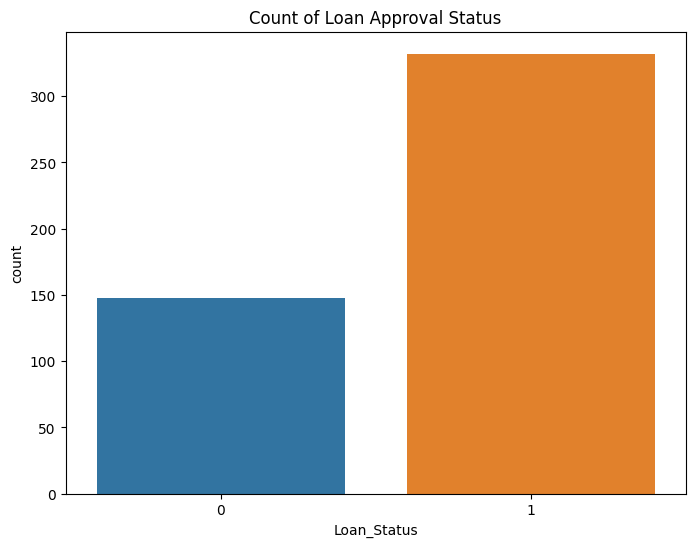

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(x='Loan_Status', data=loan_dataset)
plt.title('Count of Loan Approval Status')
plt.show()


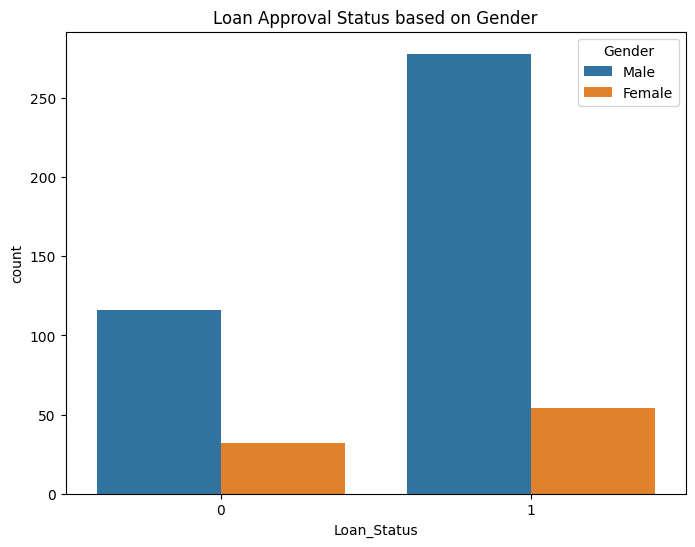

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Loan_Status', hue='Gender', data=loan_dataset)
plt.title('Loan Approval Status based on Gender')
plt.show()


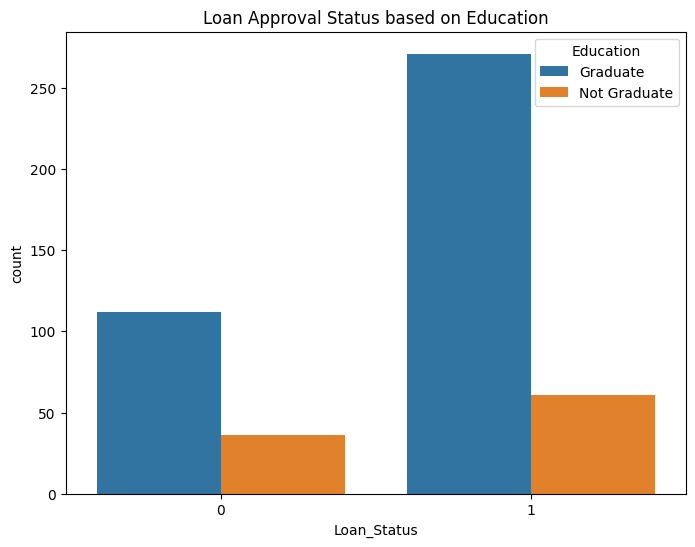

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Loan_Status', hue='Education', data=loan_dataset)
plt.title('Loan Approval Status based on Education')
plt.show()


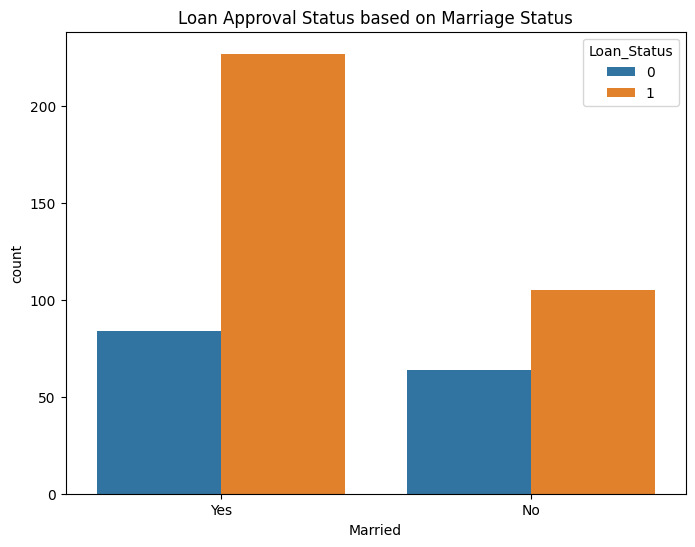

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Married', hue='Loan_Status', data=loan_dataset)
plt.title('Loan Approval Status based on Marriage Status')
plt.show()


In [ ]:
print(loan_dataset['Credit_History'].value_counts())

1.0    410
0.0     70
Name: Credit_History, dtype: int64


<ipython-input-63-b8c58ba151a7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = loan_dataset.corr()


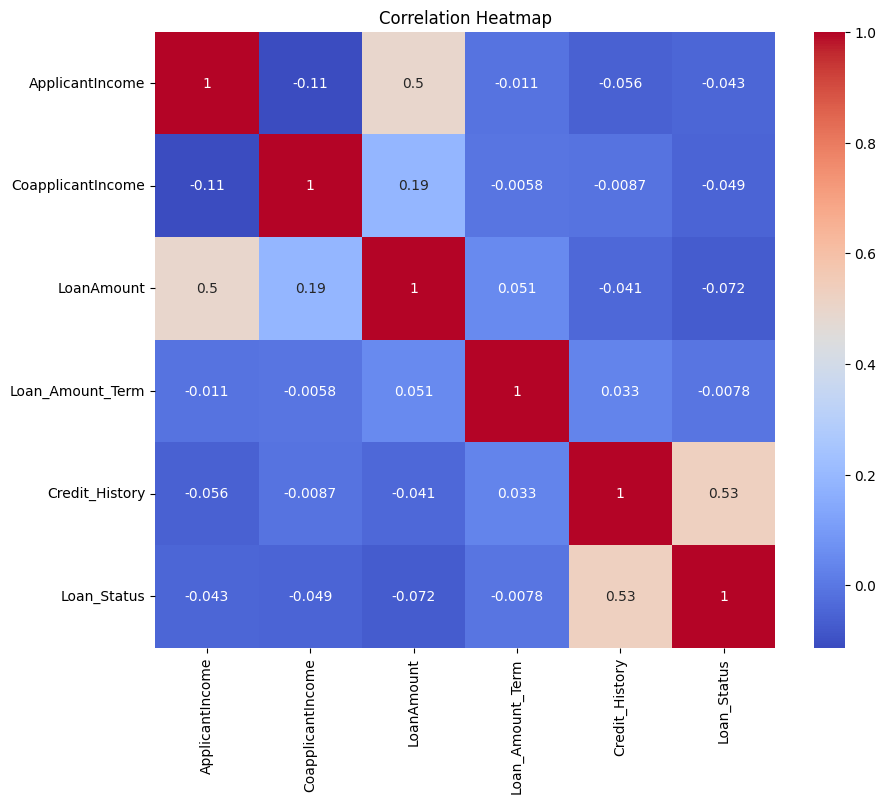

In [ ]:
correlation_matrix = loan_dataset.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

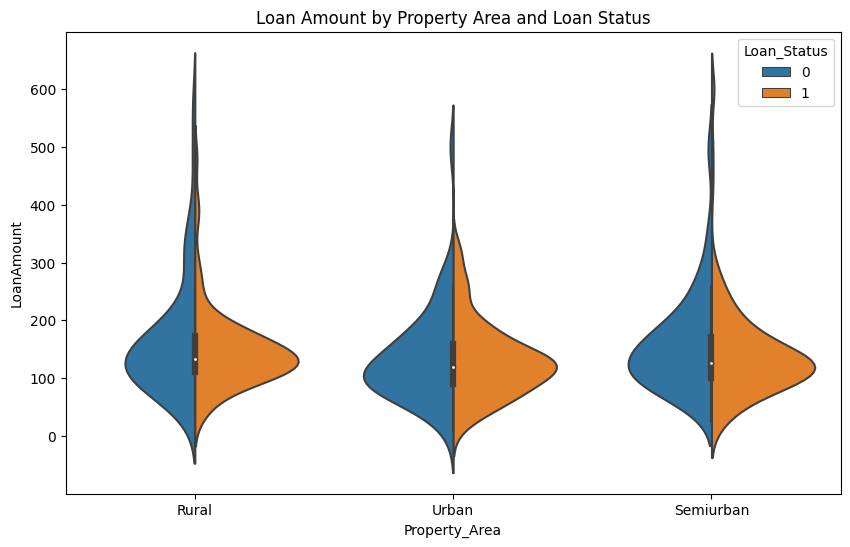

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Property_Area', y='LoanAmount', hue='Loan_Status', data=loan_dataset, split=True)
plt.title('Loan Amount by Property Area and Loan Status')
plt.show()

In [ ]:
loan_dataset.replace({ "Education":{'Graduate':1, 'Not Graduate':0}, "Married": {'Yes':1,'No':0}, "Gender": {"Male":1, "Female":0}, "Self_Employed": {'Yes':1,"No":0}, "Property_Area":{'Rural': 0, 'Semiurban': 1, 'Urban':2} }, inplace=True)

In [ ]:
loan_dataset.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,3,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1
6,LP001013,1,1,0,0,0,2333,1516.0,95.0,360.0,1.0,1,1
7,LP001014,1,1,3,1,0,3036,2504.0,158.0,360.0,0.0,2,0
8,LP001018,1,1,2,1,0,4006,1526.0,168.0,360.0,1.0,1,1
9,LP001020,1,1,1,1,0,12841,10968.0,349.0,360.0,1.0,2,0
10,LP001024,1,1,2,1,0,3200,700.0,70.0,360.0,1.0,1,1


**Splitting Data into Train and Test**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Splitting X & Y
# Select necessary features for your model
selected_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
                    'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
                    'Credit_History', 'Property_Area', 'Loan_Status']
loan_dataset = loan_dataset[selected_columns]

#X = loan_dataset.drop(columns = ['Loan_ID','Loan_Status'], axis = 1)
#Y = loan_dataset['Loan_Status']

In [ ]:
# Separate features (X) and target variable (y)
X = loan_dataset.drop('Loan_Status', axis=1)
y = loan_dataset['Loan_Status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature selection using SelectKBest
k_best = SelectKBest(f_classif, k=5)  # Select top 5 features based on ANOVA F-statistic
X_train_selected = k_best.fit_transform(X_train_scaled, y_train)
X_test_selected = k_best.transform(X_test_scaled)

In [ ]:
'''# Split Train & Test Data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, stratify=Y, random_state=2)
print(X.shape, X_train.shape, X_test.shape)'''

print(k_best)

SelectKBest(k=5)


In [ ]:
'''# Support Vector Machine ML Model
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train, Y_train)'''

# Create SVM model
svm_model = SVC(kernel='linear', C=1.0, random_state=2)

# Train the model
svm_model.fit(X_train_selected, y_train)

# Make predictions
y_pred = svm_model.predict(X_test_selected)

**Model Evaluation**

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
accuracy_train = accuracy_score(y_train, y_predd)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display evaluation metrics
print(f'Accuracy in : {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.82
Confusion Matrix:
[[16 14]
 [ 3 63]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.53      0.65        30
           1       0.82      0.95      0.88        66

    accuracy                           0.82        96
   macro avg       0.83      0.74      0.77        96
weighted avg       0.83      0.82      0.81        96

